# Solar radiation prediction
This notebook presents data analysis on a four-month dataset collected at the HI-SEAS weather station (Hawaii). The sampling rate is around 5 minutes. The objective is to derive a machine learning (ML) model to forecast solar radiation as a function of the available features.
## Dataset
The dataset consists of 
* Solar radiation [W/m^2]
* Temperature [F]
* Atmospheric pressure [Hg]
* Humidity [%]
* Wind speed [miles/h]
* Wind direction [degrees]



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
import plotly.express as px 
sns.set_style('darkgrid')


In [18]:
dataset=pd.read_csv("solar_radiation_dataset.csv")
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [19]:
dataset.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

# Split dataset

Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.

This cross-validation object is a variation of KFold. In the kth split, it returns first k folds as train set and the (k+1)th fold as test set.

In [8]:
tscv = TimeSeriesSplit(n_splits=3)
#print(tscv)
for train, test in tscv.split(dataset):
    print("%s %s" % (train, test))

[   0    1    2 ... 8170 8171 8172] [ 8173  8174  8175 ... 16341 16342 16343]
[    0     1     2 ... 16341 16342 16343] [16344 16345 16346 ... 24512 24513 24514]
[    0     1     2 ... 24512 24513 24514] [24515 24516 24517 ... 32683 32684 32685]


In [20]:
dataset['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

# Feature analysis

<AxesSubplot:>

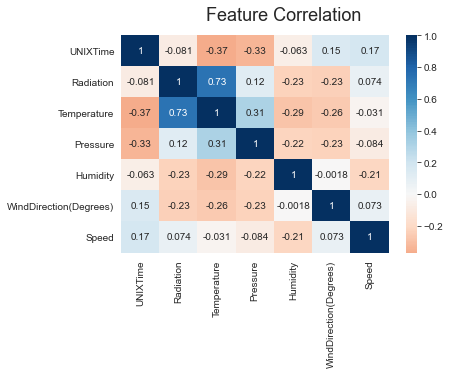

In [21]:
fig = plt.figure()
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', center=0)